In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)

### Aufgabe 28: Entfaltung in zwei Intervallen

#### a.)

Element $A_{ij}$ ist die Wahrscheinlichkeit ein Ereignis $x$ aus Bin $j$ nach
dem Messprozess als $y$ im Bin $i$ zu finden.

$$\begin{aligned}
g &= \left(g_1, g_2\right)^T\\
f &= \left(f_1, f_2\right)^T\\
g_i &= \sum^2_{j = 1} A_{ij}f_i\\
\mathbf{A} &=
\begin{pmatrix}
1 - \epsilon & \epsilon\\
\epsilon & 1 - \epsilon\\
\end{pmatrix}\\
\end{aligned}$$

---
#### b.)

$f$ erhält man durch Umformen der obigen Gleichung von $g$.

$$\begin{aligned}
\mathbf{A}^{-1} &= \frac{1}{1 - 2\epsilon}
\begin{pmatrix}
1 - \epsilon & -\epsilon\\
-\epsilon & 1 - \epsilon\\
\end{pmatrix}\\
f &= \mathbf{A}^{-1}g = \frac{1}{1 - 2\epsilon}
\begin{pmatrix}
g_1 - \epsilon(g_1 + g_2)\\
g_2 - \epsilon(g_1 + g_2)\\
\end{pmatrix}\\
\end{aligned}$$

---
#### c.)

$$\begin{aligned}
\sigma_{g1} &= \sqrt{g_1}\\
\sigma_{g2} &= \sqrt{g_2}\\
\mathbf{V}[g] &=
\begin{pmatrix}
\sigma_{g1}^2 & 0\\
0 & \sigma_{g2}^2\\
\end{pmatrix}
=
\begin{pmatrix}
g_1 & 0\\
0 & g_2\\
\end{pmatrix}\\\\
\mathbf{V}[f] &= \mathbf{A}^{-1}\mathbf{V}[g]\left(\mathbf{A}^{-1}\right)^T\\\\
\mathbf{V}[f] &= \frac{1}{(1 -2\epsilon)^2}
\begin{pmatrix}
\epsilon^2(g_1 + g_2) + g_1(1-2\epsilon) & -\epsilon(1 - \epsilon)(g_1 + g_2)\\
-\epsilon(1 - \epsilon)(g_1 + g_2) & \epsilon^2(g_1 + g_2) + g_2(1-2\epsilon)\\
\end{pmatrix}
\end{aligned}$$

---
#### d.)
$$\begin{aligned}
\rho &= \frac{cov[f_1,f_2]}{\sigma_{f1}\sigma_{f2}} = \frac{-\epsilon(1-\epsilon)(g_1 + g_2)}{\sqrt{[\epsilon^2(g_1 + g_2) + g_1(1-2\epsilon)] [\epsilon^2(g_1 + g_2) + g_2(1-2\epsilon)]}}
\end{aligned}$$

Nun folgt die Programmierung der obigen Formeln.

In [2]:
g_1 = 200
g_2 = 169
g = np.array([g_1, g_2])

def Aufgabe_28(e):
    
    A = np.array([[1-e, e],[e, 1-e]])
    inv_A = np.linalg.inv(A)
    
    f = inv_A @ g
    
    print(f'f = {f}\n\n')
    
    V_g = np.array([[g[0], 0], [0, g[1]]])
    V_f = inv_A @ V_g @ inv_A.T

    print(f'Kovarianzmatrix von f =\n{V_f}\n\n')
    
    sigma_f1 = np.sqrt(V_f[0,0])
    sigma_f2 = np.sqrt(V_f[1,1])
    
    print(f'Fehler von f_1 = {sigma_f1}\n')
    print(f'Fehler von f_2 = {sigma_f2}\n\n')
    
    cov_f = V_f[0,1]
    rho = cov_f / (sigma_f1 * sigma_f2)

    print(f'Korrelationskoeffizient von f_1 und f_2 =\n{rho}')

In [3]:
Aufgabe_28(0.1)

f = [203.875 165.125]


Kovarianzmatrix von f =
[[255.765625 -51.890625]
 [-51.890625 217.015625]]


Fehler von f_1 = 15.99267410410154

Fehler von f_2 = 14.731450200166988


Korrelationskoeffizient von f_1 und f_2 =
-0.22025324331796553


---
#### e.)

In [4]:
Aufgabe_28(e=0.4)

f = [262. 107.]


Kovarianzmatrix von f =
[[ 2476. -2214.]
 [-2214.  2321.]]


Fehler von f_1 = 49.759421218498936

Fehler von f_2 = 48.17675788178364


Korrelationskoeffizient von f_1 und f_2 =
-0.9235591729158679


Die Fehler sind viel größer als in Aufgabenteil `d.)` und der Korrelationskoeffizient ist nahezu -1.

---
#### f.)

In [5]:
#Aufgabe_28(e=0.5) # divergiert, da durch Null geteilt wird

Die Inverse von $\mathbf{A}$ lässt sich für $\epsilon = 0,5$ nicht mehr berechnen, da durch Null geteilt werden würde.
In diesem Fall kann nicht mehr unterschieden werden in welchen Bin ein gemessenes Ereigniss eingeordenen werden soll. Für den Limes $\epsilon\rightarrow0,5$ konvergiert der Korrelationskoeffizient $\rho\rightarrow -1$.

---
### Aufgabe 29: Entfaltung mit quadratischen Matrizen

#### a.)

Die Matrix $\mathbf{A}$ wird durch Aufsummieren einzelner Diagonalmatrizen erstellt.

In [6]:
def A(dimension, e):
    return e * (np.eye(dimension, k=-1) + np.eye(dimension, k=1)) + np.identity(dimension) * ([1 - e] + [1 - 2 * e] * (dimension - 2) + [1 - e])

In [7]:
d = 20
e = 0.23
A = A(dimension=d, e=e)

---
#### b.)

In [8]:
f = np.array([193, 485, 664, 763, 804, 805, 779, 736, 684, 626,
              566, 508, 452, 400, 351, 308, 268, 233, 202, 173])

In [9]:
g = A @ f

`Gemessene` Werte von $g$ errechnen, durch ziehen aus einer Poisson-Verteilung mit den Bininhalten als Erwartungswerte.

In [10]:
g_gemessen = []
for n in g:
    g_gemessen += list(np.random.poisson(n, 1))
g_gemessen = np.array(g_gemessen).reshape(len(g_gemessen))

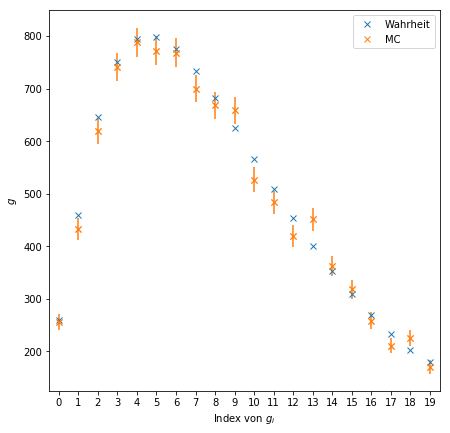

In [11]:
plt.figure(figsize=[7,7])

plt.plot(range(len(g)), g, 'x', color='C0', label='Wahrheit')
plt.plot(range(len(g_gemessen)), g_gemessen, 'x', color='C1', label='MC')
plt.errorbar(x=range(len(g_gemessen)), y=g_gemessen, yerr=np.sqrt(g_gemessen), fmt='x', color='C1')
plt.xlim(min(range(len(g))) - 0.1, max(range(len(g))) + 0.1)
plt.legend()
plt.xticks(range(len(g)))
plt.xlim(-0.5, len(g) - 0.5)
plt.ylabel(r'$g$')
plt.xlabel(r'Index von $g_i$')

plt.show()

---
#### c.)

Eigenwerte und Eigenvektoren bestimmen.

In [12]:
D, U = np.linalg.eig(A)

$$\mathbf{A} = \mathbf{U}\mathbf{D}\mathbf{U}^{-1}$$

$\mathbf{D}$ ist eine Diagonalmatrix mit den Eigenwerten auf der Diagonale und $\mathbf{U}$
ist die Transformationsmatrix in die Eigenbasis.

Faltungsgleichung in Diagonalbasis bringen:

$$\begin{aligned}
g &= \mathbf{A}f = \mathbf{U}\mathbf{D}\mathbf{U}^{-1}f\\
\Leftrightarrow \underbrace{\mathbf{U}^{-1}g}_{:=c} &= \mathbf{D}\underbrace{\mathbf{U}^{-1}f}_{:=b}\\
\Rightarrow c &= \mathbf{D}b
\end{aligned}$$

Der Vorteil der Darstellung in der Diagonalbasis liegt darin, dass die Transformation der Komponenten von $b$ und $c$
unabhängig voneinander durchgeführt wird, da $\mathbf{D}$ diagonal ist.

In [13]:
sort_D = np.argsort(np.abs(D))[::-1]
D = D[sort_D]
U = U[:, sort_D]
U_inv = np.linalg.inv(U)
D_inv = 1 / D * np.identity(len(D))

---
#### d.)


In [14]:
c = U_inv @ g_gemessen
b_entfalten = D_inv @ c

Da die Komponenten von $g$ poisson-verteilt sind, sind die $\sigma_g = \sqrt{g}$.

Kovarianzmatrix von $b$ aus den gemessenen $g$-Werten.

In [15]:
V_g_gemessen = np.identity(len(g_gemessen)) * g_gemessen
V_c_gemessen = U_inv @ V_g_gemessen @ U_inv.T
V_b_gemessen = D_inv @ V_c_gemessen @ D_inv.T

Die Entfaltenen Koeffizienten $b$ mit den zugehörigen Standardabweichungen normieren. 

In [16]:
b_entfalten_norm = abs(b_entfalten / np.sqrt(np.diag(V_b_gemessen)))

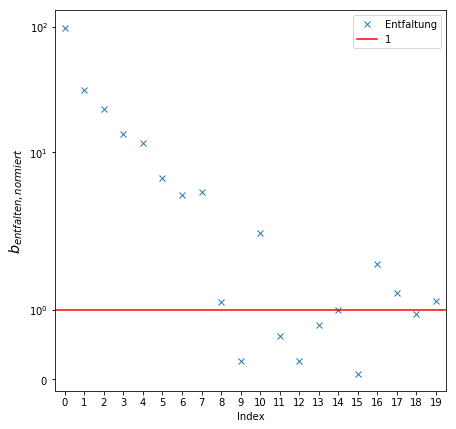

In [17]:
plt.figure(figsize=[7, 7])

plt.plot(b_entfalten_norm, 'x', label='Entfaltung')
plt.plot([-0.5, 19.5], [1, 1], 'r-', label='1')
plt.yscale('symlog')
plt.xticks(range(len(b_entfalten_norm)))
plt.xlim(-0.5, 19.5)
plt.xlabel('Index')
plt.ylabel(r'$b_{entfalten, normiert}$', fontsize='x-large')
plt.legend()

plt.show()

Die Koeffizienten $b_j$ unterhalb von eins Schwanken sehr stark und folgen keiner offensichtlichen Verteilung. Die Werte erscheinen willkürlich und somit falsch.

---
#### e.)

Alle Koeffizienten mit einem Index $> 10$ werden vernachlässigt.

In [18]:
b_regualrisiert = np.copy(b_entfalten)
b_regualrisiert[10:] = 0

In [19]:
f_reguarisiert_entfalten = U @ b_regualrisiert
f_entfalten = U @ b_entfalten

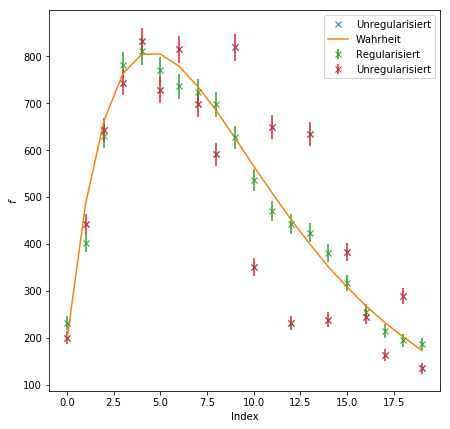

In [20]:
plt.figure(figsize=[7, 7])

plt.plot(f_entfalten, 'x', label='Unregularisiert')
plt.plot(f, '-', label='Wahrheit')
plt.errorbar(x=range(len(f_reguarisiert_entfalten)), y=f_reguarisiert_entfalten, yerr=np.sqrt(f_reguarisiert_entfalten), fmt='x', label='Regularisiert')
plt.errorbar(x=range(len(f_entfalten)), y=f_entfalten, yerr=np.sqrt(f_entfalten), fmt='x', label='Unregularisiert')
plt.xlabel('Index')
plt.ylabel(r'$f$')
plt.legend()

plt.show()

Die unregularisierte Verteilung weist starke Oszillationen um die wahren Werte auf. Im Vergleich dazu ist schwingt die regulierte Verteilung kaum.

Bei den Standardabweichungen waren wir uns nicht sicher, wie diese bei der Regularisierung transformiert werden müssen.

---
### Aufgabe 30

#### a.)

In [21]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [22]:
df = pd.read_hdf('image_parameters_smd_reduced.hdf5')

In [23]:
df['label'] = df['corsika_run_header_particle_id'] == 1

Die MC-Wahrheit soll aus dem Datensatz entfernt werden. Es werden somit die Attribute der Gesamtenergie und die Teilchenindizierung, sowie die Event-Nummer und die Event-ID weggelassen.

In [24]:
X = df.drop(columns=['corsika_event_header_total_energy', 'corsika_run_header_particle_id', 'event_num', 'run_id'])

In [25]:
train, test = sklearn.model_selection.train_test_split(X, test_size=0.2)

---
#### b.)

In [26]:
y_train = train['label']
y_test = test['label']

X_train = train.drop(columns=['label'])
X_test = test.drop(columns=['label'])

In [27]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_curve, roc_auc_score, make_scorer, accuracy_score

for n in [1, 10, 100]:
    rf = RandomForestClassifier(n_estimators=n, max_depth=2, random_state=0)
    score = cross_validate(rf, X_train, y_train, scoring=make_scorer(roc_auc_score), cv=5)
    print(f'n = {n}')
    print('ROC AUC Random Forest {:0.3f} +/- {:0.3f}'.format(score['test_score'].mean(), score['test_score'].std()))
    score = cross_validate(rf, X_train, y_train, scoring=make_scorer(accuracy_score), cv=5)
    print('Accuracy {:0.3f} +/- {:0.3f}\n'.format(score['test_score'].mean(), score['test_score'].std()))

n = 1
ROC AUC Random Forest 0.602 +/- 0.005
Accuracy 0.601 +/- 0.005

n = 10
ROC AUC Random Forest 0.624 +/- 0.002
Accuracy 0.624 +/- 0.002

n = 100
ROC AUC Random Forest 0.620 +/- 0.004
Accuracy 0.620 +/- 0.004



Die Accuracy des Random Forest ist für 10 Bäume am größten.

---
#### c.)

Trainieren des RandomForest auf den Trainingsdaten mit der Funktion `fit`.
Berechnen der Vorhersage des trainierten RandomForest auf den Testdatensatz mit mit Hilfe der Funkiton `predict_proba`.

In [28]:
rf.fit(X_train, y_train)

y_prediction_proba = rf.predict_proba(X_test)

---
#### d.)

Erstellen der `ROC-Kurve` und der `AUC`. 

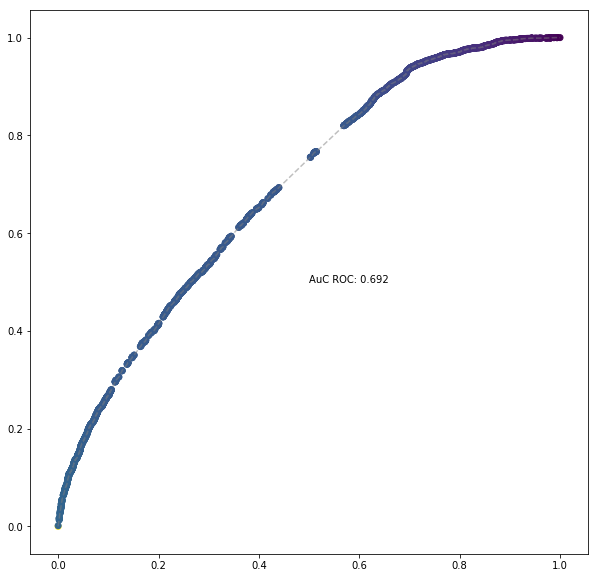

In [29]:
auc = roc_auc_score(y_test, y_prediction_proba[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, y_prediction_proba[:, 1])

plt.figure(figsize=[10,10])

plt.scatter(fpr, tpr, c=thresholds)
plt.plot(fpr, tpr, '--', color='gray', alpha=0.5)
plt.text(0.5, 0.5, f'AuC ROC: {auc:0.03f}')

plt.show()